# **Image Classification(CFAR-10)with CNN**

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2024/06/image-29.png)

In [109]:
# Import necessary libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical

# Load the MNIST dataset from a local npz file
data = np.load('mnist.npz')

# Extract training and testing data
X_train = data['x_train']
y_train = data['y_train']
X_test = data['x_test']
y_test = data['y_test']

# Preprocess the data
# Reshape the data to have a single channel (grayscale), input shape (28, 28, 1)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)  # 10 classes for digits 0-9
y_test = to_categorical(y_test, 10)

# Build the CNN model
model = Sequential()

# First convolutional layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

# First max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

# Second max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps
model.add(Flatten())

# Fully connected layer with 100 neurons
model.add(Dense(100, activation='relu'))

# Output layer for 10 classes (digits 0-9)
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 100)            │       160,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 179,926 (702.84 KB)

 Trainable params: 179,926 (702.84 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.8930 - loss: 0.3495 - val_accuracy: 0.9804 - val_loss: 0.0671
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9840 - loss: 0.0521 - val_accuracy: 0.9852 - val_loss: 0.0482
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9897 - loss: 0.0314 - val_accuracy: 0.9882 - val_loss: 0.0388
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9923 - loss: 0.0229 - val_accuracy: 0.9877 - val_loss: 0.0417
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9954 - loss: 0.0148 - val_accuracy: 0.9877 - val_loss: 0.0450
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9953 - loss: 0.0143 - val_accuracy: 0.9893 - val_loss: 0.0393
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9962 - loss: 0.0109 - val_accuracy: 0.9893 - val_loss: 0.0406
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9972 - loss: 0

In [144]:
# Testing Recognise new image
import cv2
import tensorflow as tf
from PIL import Image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

model.save('cnn_model_MNIST.h5')

In [147]:
model = load_model('cnn_model_MNIST.h5')

# Memuat dan preprocessing gambar baru
path = r'/Users/ryanakmalpasya/Documents/[1] BS/[2] Freelance/PROJECTS/[1] EMERGING/[2] AI/[1] ML/Deep Learning/Image Classification(MNIST) with CNN/assets/handwriting_number.png'
# Resize the image to 28x28 pixels (same as MNIST input shape)
image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

try:
    image_resized = cv2.resize(image, (28, 28))
except Exception as e:
    print(f"Error resizing image: {e}")


image_inverted = cv2.bitwise_not(image_resized)
    
# Normalize the pixel values (0-255 to 0-1)
image_normalized = image_inverted.astype('float32') / 255.0
    
# Reshape the image to match the input shape (1, 28, 28, 1)
image_reshaped = np.reshape(image_normalized, (1, 28, 28, 1))


image_reshaped


array([[[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         

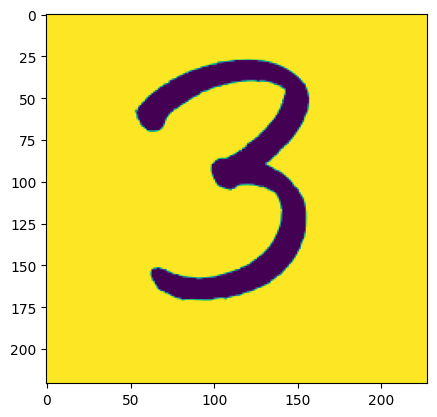

In [148]:
plt.imshow(image)

In [149]:
prediction = model.predict(image_reshaped)

predicted_digit = np.argmax(prediction[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


In [150]:
print(f"Predicted Digit: {predicted_digit}")

Predicted Digit: 3
